In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [15]:
img = cv2.imread('E:/Computer-Vision-with-Python/DATA/pennies.jpg')

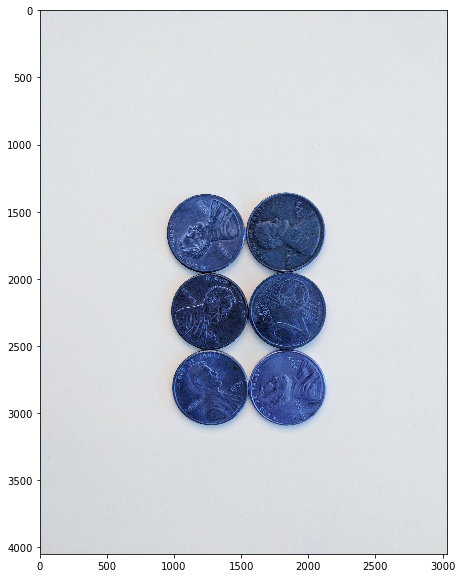

In [16]:
display(img)

In [17]:
#median blur
blur_img = cv2.medianBlur(img,25)

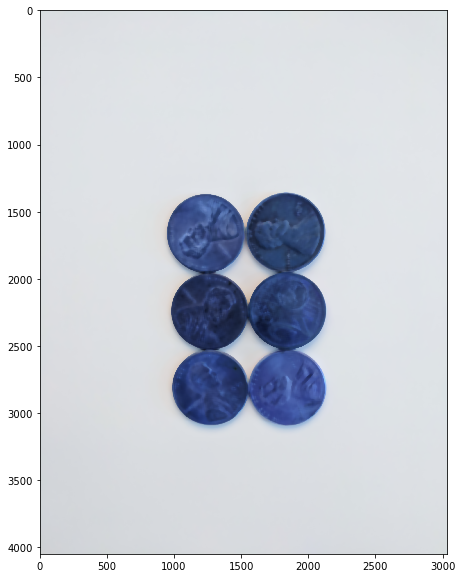

In [18]:
display(blur_img)

In [12]:
#Converting the image into grayScale
gray_img = cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY)

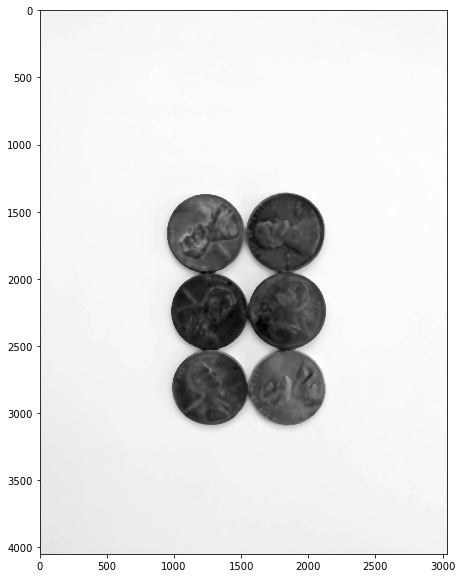

In [19]:
display(gray_img)

In [31]:
#Binary Thresholding
ret,binary_thresh = cv2.threshold(gray_img.copy(),170,255,cv2.THRESH_BINARY_INV)

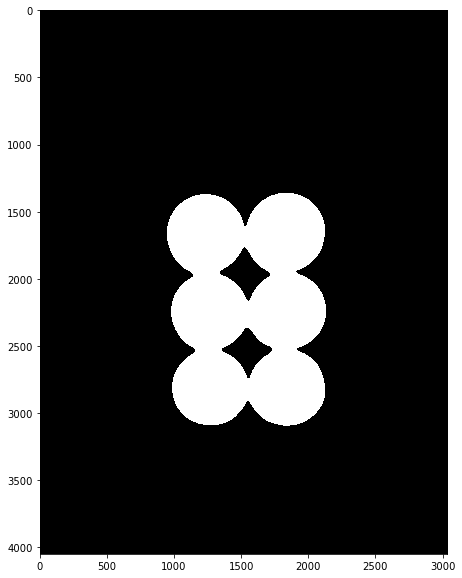

In [32]:
display(binary_thresh)

In [34]:
#contouring
image,contours,hierarchy = cv2.findContours(binary_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [36]:
for i in range(len(contours)):
  if hierarchy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),10)

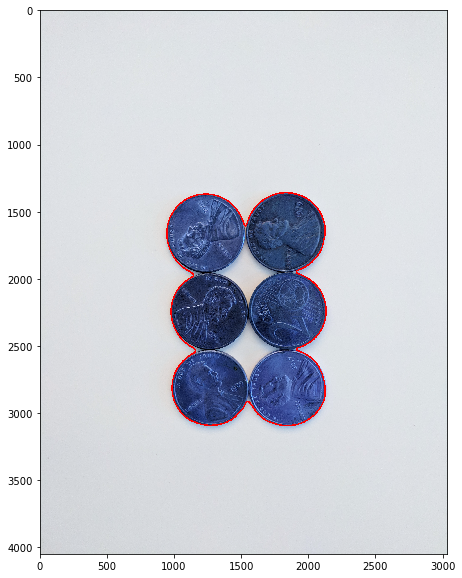

In [37]:
display(img)

In [4]:
#now doing  watershed algorithm
img2 = cv2.imread('E:/Computer-Vision-with-Python/DATA/pennies.jpg')

In [7]:
#applying median blur
img2 = cv2.medianBlur(img2,35)

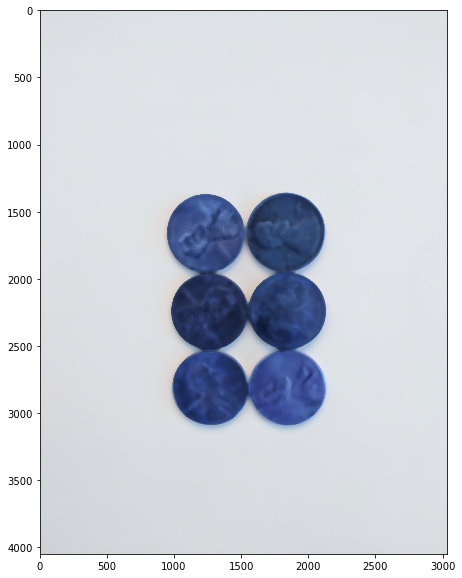

In [6]:
display(img2)

In [8]:
#converting it into grey scale
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

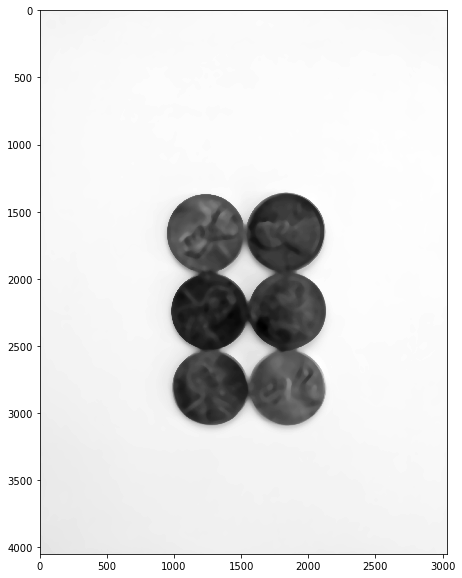

In [9]:
display(gray)

In [12]:
#applying image thresholding
ret,thresh = cv2.threshold(gray,125,255,cv2.THRESH_BINARY_INV)

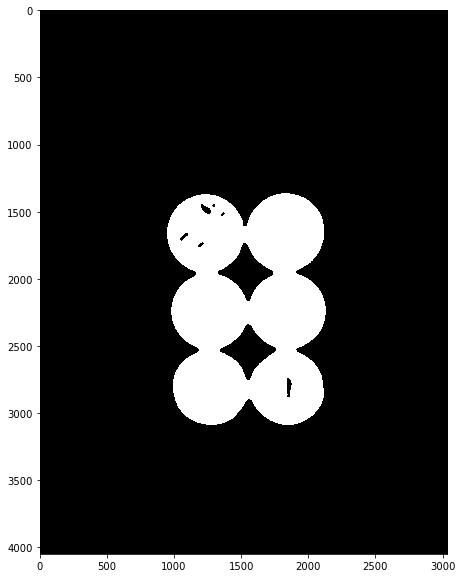

In [13]:
display(thresh)

In [14]:
#there are some noise in the middle so we add otsu nethod of thresholding to it 
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


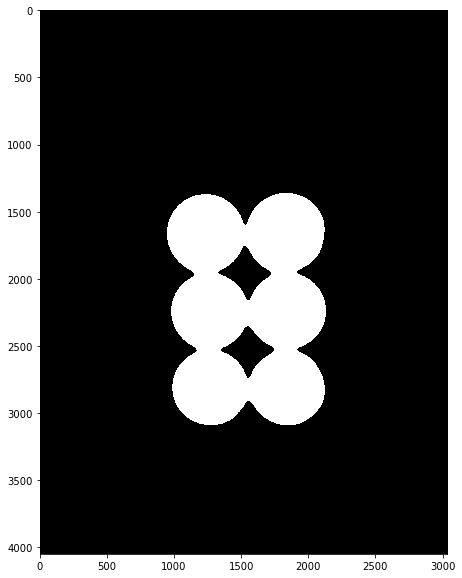

In [16]:
display(thresh)

In [17]:
#removing noise by morphological opertors
kernel = np.ones((3,3),np.uint8)

In [18]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [20]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

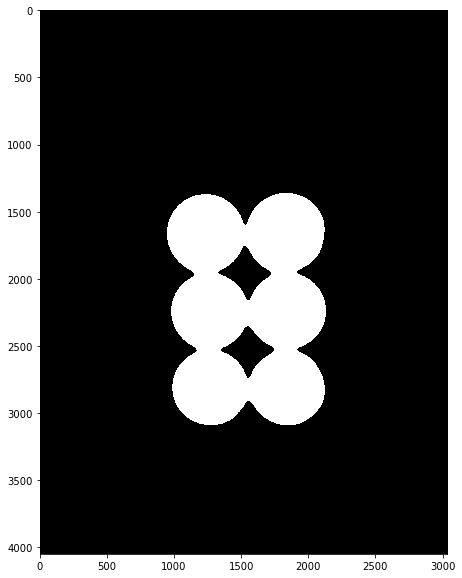

In [21]:
display(opening)

In [22]:
#backgroud
sure_bg = cv2.dilate(opening,kernel,iterations=3)

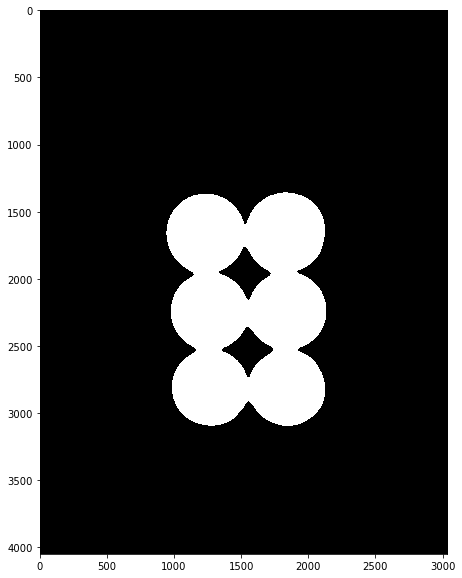

In [23]:
display(sure_bg)

In [24]:
#distance tranformation
dist_transform= cv2.distanceTransform(opening,cv2.DIST_L2,5)

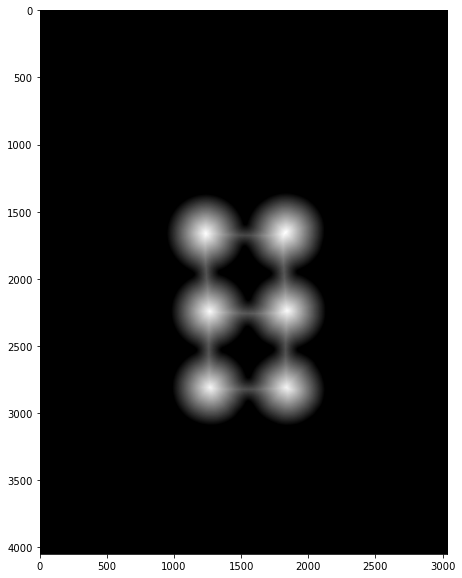

In [25]:
display(dist_transform)

In [26]:
#thresholding
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

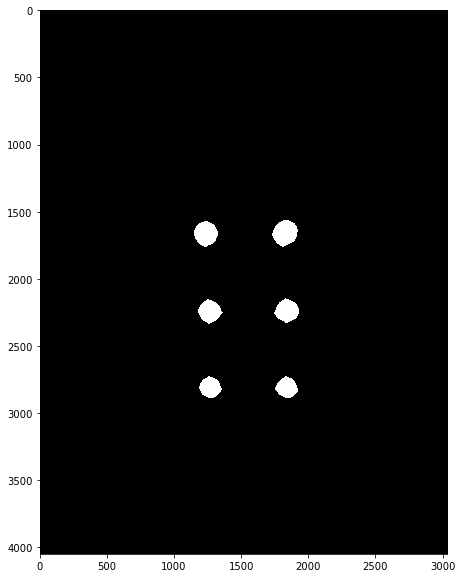

In [27]:
display(sure_fg)

In [29]:
sure_fg = np.uint8(sure_fg)

In [30]:
unkown = cv2.subtract(sure_bg,sure_fg)

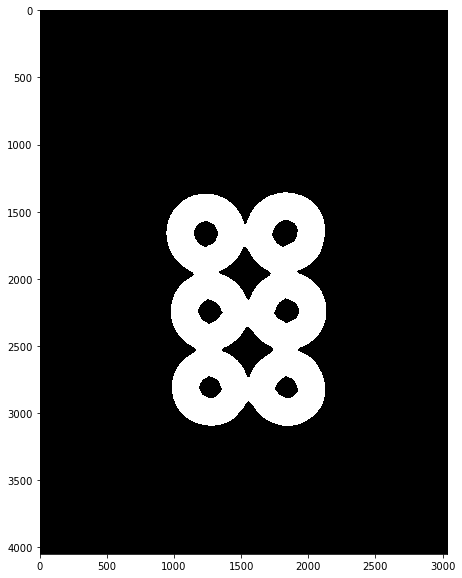

In [31]:
display(unkown)

In [33]:
ret,markers = cv2.connectedComponents(sure_fg)

In [34]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [35]:
markers = markers+1

In [36]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [37]:
markers[unkown==255] = 0

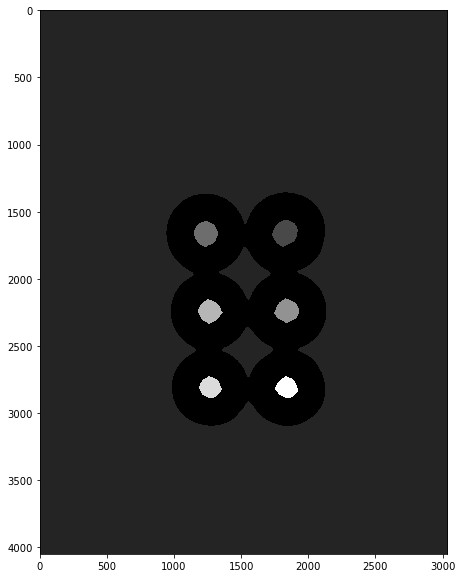

In [38]:
display(markers)

In [40]:
markers = cv2.watershed(img2,markers)

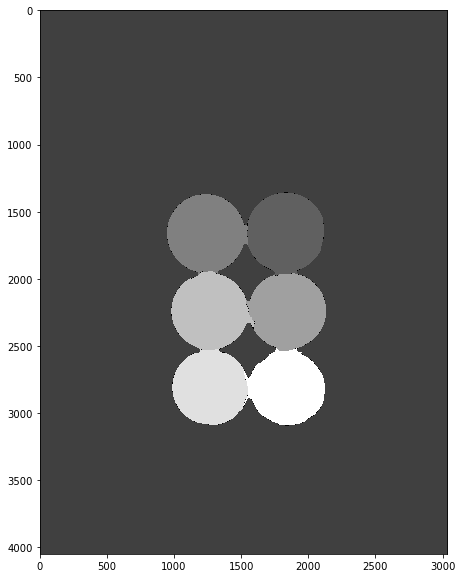

In [41]:
display(markers)

In [42]:
#applying contouring

In [43]:
image,contours,hierarchy = cv2.findContours(markers,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [44]:
for i in range(len(contours)):
  if hierarchy[0][i][3] == -1:
        cv2.drawContours(img2,contours,i,(255,0,0),10)

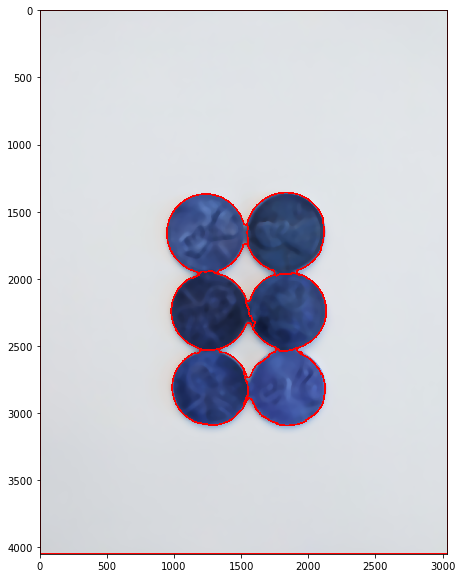

In [45]:
display(img2)